# Assignment6

## Task1

### Task1.1

In [18]:
# Import pandas into namespace and give it a shorter name 'pd' for easier use
import pandas as pd
review = pd.read_csv('data/review.csv')
review.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [19]:
# Shape of the dataset
review.shape

(10000, 10)

In [20]:
# Data Type of the dataset
review.dtypes

business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object

In [21]:
# Description of the dataset
review.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [22]:
# Check for missing values. 
review.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

### Task1.2

In [23]:
# The distribution of star ratings
review.groupby('stars').stars.count()

stars
1     749
2     927
3    1461
4    3526
5    3337
Name: stars, dtype: int64

### Task1.3

In [24]:
# Number of businesses reviewed
review.business_id.unique().shape[0]

4174

### Task1.4

In [25]:
# Top 10 businesses with best average ratings
review.groupby('business_id').stars.mean().sort_values(ascending=False).head(10)

business_id
zyYRWnimLbQt9aCCI_2MZw    5.0
o2rrTbAxGXrdQKQvKDcGiA    5.0
oHjoahzL5F0m-OGDQouEGw    5.0
PgcuQvFl76bx42xIFyhzVg    5.0
oGYPsU7IJPhyVpd0F5lfTg    5.0
PqJwKYHU_eHjw0q0NlULJw    5.0
PrYz1XEnvGJ-5Q0VVPCLnQ    5.0
oBVS96DtPGk9GU8zPx5Hjg    5.0
PwtYeGu-19v9bU4nbP9UbA    5.0
Q-dsvMlhEr9TgvX8FxW4uQ    5.0
Name: stars, dtype: float64

### Task1.5

In [26]:
# Top 10 businesses with best average ratings with more than 10 reviews
more_than_10 = review.business_id.value_counts() > 10
review[review.business_id.isin(more_than_10[more_than_10.values == True].index)].groupby('business_id').stars.mean().sort_values(ascending=False).head(10)

business_id
KBG28p3lGX17hOPoHhq5PQ    4.818182
z3yFuLVrmH-3RJruPEMYKw    4.769231
Bc4DoKgrKCtCuN-0O5He3A    4.750000
6oRAC4uyJCsJl1X0WZpVSA    4.583333
7SO_rX1F6rQEl-5s3wZxgQ    4.571429
zp713qNhx8d9KCJJnrw1xA    4.545455
I4bSn5gXsHuSPu7L-d_8nQ    4.545455
IuAPYzf3NSyfyXYgT46YVA    4.545455
hfl62LX14YqNpG0g0Tj6_Q    4.533333
L9UYbtAUOcfTgZFimehlXw    4.526316
Name: stars, dtype: float64

### Task1.6

In [27]:
# Top 10 reviewers whose reviews got the most total number of useful ratings by user_id
review.groupby('user_id').useful.sum().sort_values(ascending=False).head(10)

user_id
fczQCSmaWF78toLEmb0Zsw    293
C8ZTiwa7qWoPSMIivTeSfw    143
P2kVk4cIWyK4e4h14RhK-Q    132
4ozupHULqGyO42s3zNUzOQ    130
0bNXP9quoJEgyVZu9ipGgQ    115
sEWeeq41k4ohBz4jS_iGRw    103
wHg1YkCzdZq9WBJOTRgxHQ    100
kGgAARL2UmvCcTRfiscjug     82
73eZuIuXVD5sif7GrIMfuQ     76
C6IOtaaYdLIT5fWd7ZYIuA     74
Name: useful, dtype: int64

### Task1.7

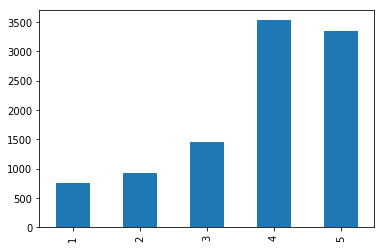

In [28]:
# A bar chart for star ratings (ordered 1 through 5)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
review.stars.value_counts().sort_index().plot(kind='bar')

### Task1.8

C:\Users\chyua\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


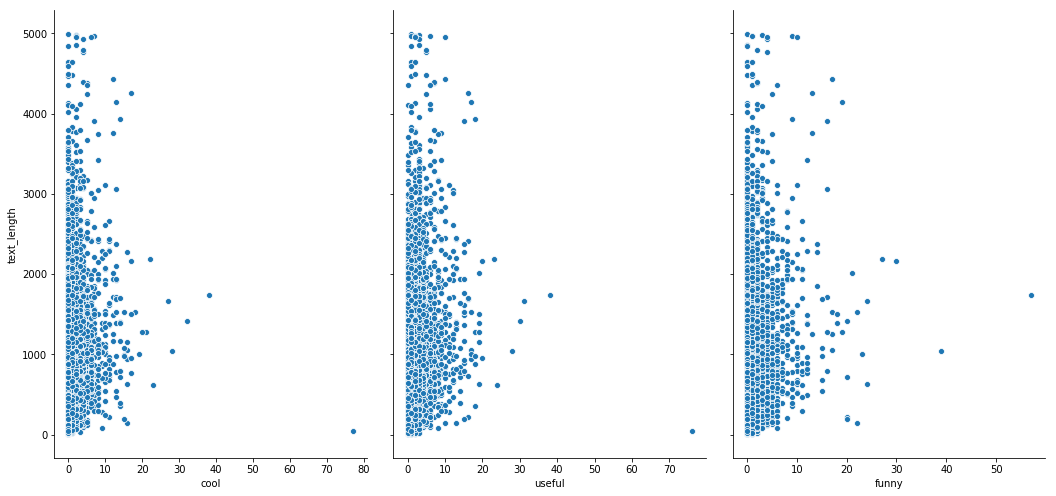

In [29]:
# Plot and see the relationship between review text's lengths and cool/useful/funny respectively
review['text_length'] = 0
for index,row in review.iterrows():
    review.loc[index,'text_length'] = len(row.text)
sns.pairplot(review,x_vars=['cool','useful','funny'],y_vars=['text_length'], size=7, aspect=0.7)

### Task1.9

In [30]:
# Try to find any duplications
review.text.unique().size

9998

In [31]:
# List the duplications
dup = review.groupby('text').count()>1
review[review.text.isin(dup[dup.values==True].index)]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
284,Hf_MFIPi7ZiIWDQodJMzwg,2012-10-25,9l7FzgtZobP81lMwEQy4AA,5,Great service,review,9VmTOyq01oIUk5zuxOj1GA,0,0,1,13
3921,kkBMTNET2xgHCW-cnNwKxA,2012-12-21,M_GC_TG9TpSzMAUQ_TAimw,5,Great service,review,9VmTOyq01oIUk5zuxOj1GA,0,0,0,13
4372,jvvh4Q00Hq2XyIcfmAAT2A,2012-06-16,ivGRamFF3KurE9bjkl6uMw,2,This review is for the chain in general. The l...,review,KLekdmo4FdNnP0huUhzZNw,0,0,0,1747
9680,rIonUa02zMz_ki8eF-Adug,2012-06-16,mutQE6UfjLIpJ8Wozpq5UA,2,This review is for the chain in general. The l...,review,KLekdmo4FdNnP0huUhzZNw,0,0,0,1747


Since the duplicated text is from the same user_id but to different business_id, we have decided not to remove the duplicates

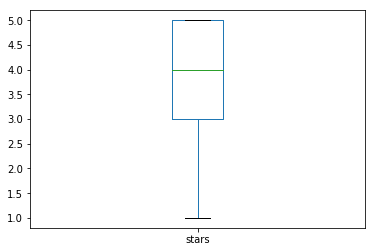

In [32]:
#boxplot showing distribution of star ratings among all reviews
review.stars.plot(kind='box')

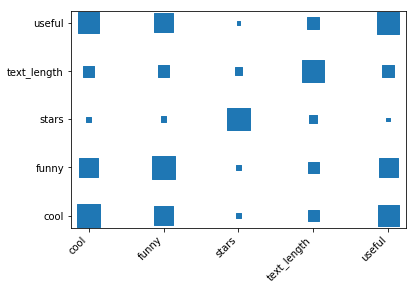

In [33]:
#correlation graph showing correlations between each parameters
import matplotlib.pyplot as plt
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
#data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
#columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'city-mpg', 'price'] 
corr = review.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

## Task2

### Task2.1

In [34]:
X = review.text
y = review.stars

# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

# Learn training data vocabulary and use it to create a dtm
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

# Try using the Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Caculate the accuracy score
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.4712

In [35]:
# Print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 55,  14,  24,  65,  27],
       [ 28,  16,  41, 122,  27],
       [  5,   7,  35, 281,  37],
       [  7,   0,  16, 629, 232],
       [  6,   4,   6, 373, 443]], dtype=int64)

### Task2.2

In [171]:
# Use only reviews with star ratings 1 or 5
X = review[(review.stars == 1) | (review.stars == 5)].text
y = review[(review.stars == 1) | (review.stars == 5)].stars

# Repeat the steps in Task2.1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9187866927592955

In [172]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[126,  58],
       [ 25, 813]], dtype=int64)

In [173]:
# The false positive reviews
pd.set_option('display.max_colwidth', -1)
X_test[(y_test == 1) & (y_pred_class==5)].head()

2175    This has to be the worst restaurant in terms of hygiene. Two of my friends had food -poisoning after having dinner here. The food is just unhealthy with tons of oil floating on the top of curries, and I am not sure if any health/hygiene code is followed here. \nThe service is poor and the information on its website is incorrect, the owner does not allow dine-in after 9 or 10 even though it says that the restaurant is open till 11. \n\nOne night I saw the owner cleaning the place without gloves and she was nice enough to give us a to-go parcel without cleaning her hands (great example to the servers!). I had a peek inside the kitchen when the door was ajar, and it definitely looked dirty.\n\nI have been a lot of hole-in-the-wall places around this restaurant, including Haji Baba, the Vietnamese place and others, but neither any of my friends nor I have fallen sick coz of the food. If you need a spicy-food fix, i strongly recommend you do not try this place, lest you want a visit

In [174]:
# The false negative reviews
X_test[(y_test == 5) & (y_pred_class==1)].head()

7148    I now consider myself an Arizonian. If you drive a lot on the 101 or 51 like I do, you'll get your fair share of chips on your windshield. You'll also have to replace a windshield like I had to do just recently. Apparently, chips and cracking windshields  is common in Arizona. In fact, I seem to recall my insurance agent telling me that insurance companies must provide this coverage in Arizona.\n\nI had a chip repaired about a year ago near the very bottom of the windshield. Just recently a small, very fine crack started traveling north on the windshield from the repaired chip (a different vendor repaired the chip). I called these guys over to my house and they said it was too long to fix, so they replaced the whole windshield the next day.\n\nWhat great service, they come out to your residence or place of business to repair or replace your windshield.                                                                                                                                

### Task2.3

In [175]:
# Store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
# Calculate the frequeny of each token appears across all s1 and s5 reviews
s1_token_frequency = (nb.feature_count_[0, :]+1)/nb.class_count_[0]
s5_token_frequency = (nb.feature_count_[1, :]+1)/nb.class_count_[1]
# Calculate the ratio of s1-to-s5 and s5-to-s1 for each token
s1_token_ratio = s1_token_count/s5_token_count
s5_token_ratio = s5_token_count/s1_token_count
# Create a DF of tokens with the frequencies and ratio
tokens = pd.DataFrame({'star_1':s1_token_frequency, 'star_5':s5_token_frequency, 'star_1_ratio':s1_token_ratio,
                       'star_5_ratio':s5_token_ratio}, index=X_train_tokens)

In [176]:
# List the top 10 token words with the highest s5-to-s1 ratio 
# These are the top 10 token words in the training data that are most predictive of 5-star reviews
tokens.sort_values('star_5_ratio', ascending=False).head(10)

,star_1,star_5,star_1_ratio,star_5_ratio
fantastic,0.003540,0.077231,0.045834,21.817727
perfect,0.005310,0.098039,0.054159,18.464052
yum,0.001770,0.024810,0.071339,14.017607
favorite,0.012389,0.138055,0.089742,11.143029
outstanding,0.001770,0.019608,0.090265,11.078431
brunch,0.001770,0.016807,0.105310,9.495798
gem,0.001770,0.016006,0.110575,9.043617
mozzarella,0.001770,0.015606,0.113410,8.817527
pasty,0.001770,0.015606,0.113410,8.817527
amazing,0.021239,0.185274,0.114635,8.723323


In [177]:
# List the top 10 token words with the highest s1-to-s5 ratio 
# These are the top 10 token words in the training data that are most predictive of 1-star reviews
tokens.sort_values('star_1_ratio', ascending=False).head(10)

,star_1,star_5,star_1_ratio,star_5_ratio
staffperson,0.030088,0.0004,75.191150,0.013299
refused,0.024779,0.0004,61.922124,0.016149
disgusting,0.042478,0.0008,53.076106,0.018841
filthy,0.019469,0.0004,48.653097,0.020554
unacceptable,0.015929,0.0004,39.807080,0.025121
acknowledge,0.015929,0.0004,39.807080,0.025121
unprofessional,0.015929,0.0004,39.807080,0.025121
ugh,0.030088,0.0008,37.595575,0.026599
yuck,0.028319,0.0008,35.384071,0.028261
fuse,0.014159,0.0004,35.384071,0.028261


## Task3

### Task3.1

Method 1 by Naive Bayes with stopwords filtering

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.feature_extraction.text import CountVectorizer
# Add stopwords filtering
vect = CountVectorizer(stop_words='english',max_features=10000)
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [179]:
# Try using the Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9246575342465754

Method 2 by Logistic Regression with stopwords filtering

In [180]:
# Try Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

C:\Users\chyua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9295499021526419

In [181]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[143,  41],
       [ 31, 807]], dtype=int64)

Method 3 by KNN with stopwords filtering

In [182]:
# Try KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_dtm, y_train)
y_pred_class = knn.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_class)

0.8307240704500979

In [183]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 17, 167],
       [  6, 832]], dtype=int64)

Method 4 Logistic Regression using 5-star to 1-star rating ratio as weight 

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english',max_features=10000)
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [185]:
X_train_new = pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())

In [186]:
X_train_new.head()

,00,000,00am,00pm,01,05,07,09,0buxoc0crqjpvkezo3bqog,10,...,zipps,ziti,zoe,zombi,zone,zoo,zucchini,zuchinni,zumba,zuzu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
tokens.head()

,star_1,star_5,star_1_ratio,star_5_ratio
00,0.047788,0.016006,2.985531,0.334949
000,0.008850,0.002401,3.685841,0.271309
00a,0.003540,0.000400,8.846018,0.113045
00am,0.007080,0.001200,5.897345,0.169568
00pm,0.003540,0.002001,1.769204,0.565226


In [188]:
X_train_new.columns

Index(['00', '000', '00am', '00pm', '01', '05', '07', '09',
       '0buxoc0crqjpvkezo3bqog', '10',
       ...
       'zipps', 'ziti', 'zoe', 'zombi', 'zone', 'zoo', 'zucchini', 'zuchinni',
       'zumba', 'zuzu'],
      dtype='object', length=10000)

In [189]:
for index, row in tokens.iterrows():  # user interrows() to iterate a DataFrame
    value=index
    if value in X_train_new.columns:
        X_train_new[value]=X_train_new[value]*row.star_5_ratio
X_train_new.head()

,00,000,00am,00pm,01,05,07,09,0buxoc0crqjpvkezo3bqog,10,...,zipps,ziti,zoe,zombi,zone,zoo,zucchini,zuchinni,zumba,zuzu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
# Try Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_new, y_train)
y_pred_class = logreg.predict(X_test_dtm)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

C:\Users\chyua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.38454011741682975

Method 5 Logistic Regression with 10-fold validation

In [191]:
vect= CountVectorizer(encoding='utf-8',stop_words='english',min_df=0.02, max_df=0.5)
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [192]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn import metrics


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#logreg.fit(X_train_dtm, y_train)
#y_pred_class = logreg.predict(X_test_dtm)
y_pred_class=cross_val_predict(logreg,vect.transform(X), y.values.ravel(), cv=10)


metrics.accuracy_score(y, y_pred_class)

C:\Users\chyua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9074889867841409

Method 6: By Decision Tree

In [193]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [194]:
# train model
model.fit(X_train_dtm, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [195]:
y_pred_class = model.predict(X_test_dtm)

In [196]:
metrics.accuracy_score(y_test, y_pred_class)

0.812133072407045

In [197]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[115,  69],
       [123, 715]], dtype=int64)

In [198]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.48      0.62      0.55       184
           5       0.91      0.85      0.88       838

   micro avg       0.81      0.81      0.81      1022
   macro avg       0.70      0.74      0.71      1022
weighted avg       0.83      0.81      0.82      1022



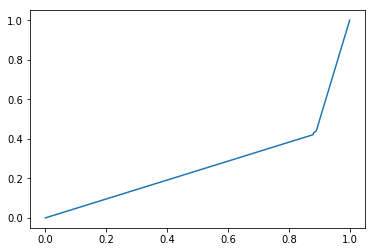

In [199]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_prob = cross_val_predict(model,vect.transform(X),y,cv=10,method='predict_proba')
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:,1], pos_label=1)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr,tpr)

In [200]:
# Area under ROC curve
roc_auc=auc(fpr,tpr)
roc_auc

0.26873109806182494

Method 7: Ensemble method (Random Forest)

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train_dtm, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [202]:
y_pred_class = clf.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_class)

0.8199608610567515

## Task3.2

Use only business_id with more than 10 reviews

Method 1: By Naive Bayes

In [203]:
# Refine X and y
X = review[review.business_id.isin(review.business_id.unique()[review.business_id.value_counts()>10])].text
y = review[review.business_id.isin(review.business_id.unique()[review.business_id.value_counts()>10])].stars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english', max_features = 10000)
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.5192307692307693

Method 2: Filter out reviews which are considered funny and cool

In [204]:
X = review[(review.funny < 5) & (review.cool < 5)].text
y = review[(review.funny < 5) & (review.cool < 5)].stars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english', max_features = 10000)
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.49579478553406225

Method 3: Filter out reviews with short text length

In [205]:
X = review[(review.text_length>50)].text
y = review[(review.text_length>50)].stars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english', max_features = 10000)
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.4991823385118561

## Task4

Try define a sample of positive and negative word list and count the number of positive and negative words in the text.

In [206]:
positive_words = ['good','excellent','exceptional','favorable','great','marvelous','positive','satisfying','superb','valuable',
             'wonderful','flawless','perfect','solid','ace','nice','pleasing','worthy','prime','precious']
negative_words = ['bad','atrocious','awful','crummy','dreadful','lousy','poor','rough','sad','unacceptable','disastrous',
            'distressing','harsh','painful','terrible','grim','unfavorable','unfortunate','unpleasant','discouraging']
review['+ve_words'] = 0
review['-ve_words'] = 0
for index,row in review.iterrows():
    number = 0
    for i in range(len(positive_words)):
        number = number + row.text.count(positive_words[i])
    review.loc[index,'+ve_words'] = number
    number = 0
    for i in range(len(negative_words)):
        number = number + row.text.count(negative_words[i])
    review.loc[index,'-ve_words'] = number

In [207]:
X = review[(review.stars == 1) | (review.stars == 5)][['+ve_words','-ve_words']]
y = review[(review.stars == 1) | (review.stars == 5)]['stars']
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Try Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

C:\Users\chyua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8317025440313112

In [208]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 20, 164],
       [  8, 830]], dtype=int64)